17)Develop a Logistic regression model where you have to decide a patient is prone to cardiac arrest or not .

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
data=pd.read_csv("/content/heart.csv")

In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [32]:
data.shape

(1025, 14)

In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Weights= 0       168
1       155
2       125
3       161
4       106
       ... 
1020    164
1021    141
1022    118
1023    159
1024    113
Name: thalach, Length: 1025, dtype: int64


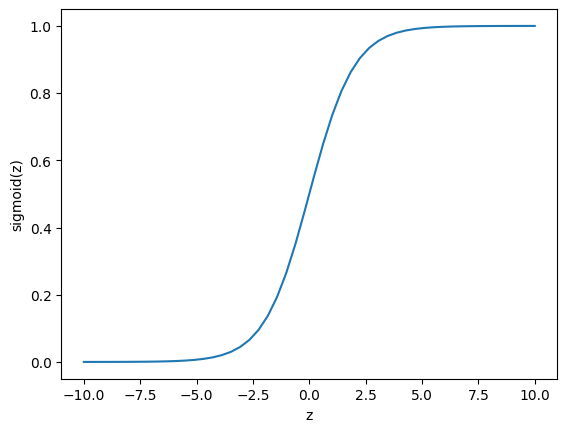

Actual Value= 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64
Predicted Value= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [34]:
#Find sigmoid of the dataset

t=0.5
n=768
b= 0
predicted=[]
def NN(x,wt,b):
  z=0
  q=0
  for i in range(0,n):
    z=x[i]*wt[i]+b
    #print("Prediction=",z)
    if z<=1:
      predicted.append(0)
    else:
      predicted.append(1)
    q+=z
  return sigmoid(q)
def sigmoid(x):
  return 1/(1+np.exp(-x))
x=data['chol']
actual=data['target']
w=data['thalach']
wt=np.transpose(w)
print("Weights=",w)

#plotting
NN(x,wt,b)
z = np.linspace(-10, 10, 50)
pl = sigmoid(z)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.plot(z, pl)
plt.show()


#Actual and predicted value.
print("Actual Value=",actual)
print("Predicted Value=",predicted)

In [35]:
#Find Probability

p_yes=0
a_yes=0
for i in range(0,n):
  if predicted[i]==1:
    p_yes+=1
  if actual[i]==1:
    a_yes+=1

p=p_yes/n
print("Probability Score=",p)

Probability Score= 1.0


In [36]:
#Find ODDS

odd=p/(-1-p)
print("Odds Function=",odd)

Odds Function= -0.5


In [ ]:
#Find Cost Function

cost= -(p*math.log(p) + (i-p)*math.log(1-p))/n
print("Cost Function=",cost)

In [ ]:
#Confusion Matrix

shape = (2, 2)
conf = np.zeros(shape)

for i in range (0,n):
  if actual[i]==0 and predicted[i]==0:
    conf[0][0]+=1
  elif actual[i]==0 and predicted[i]==1:
    conf[0][1]+=1
  elif actual[i]==1 and predicted[i]==1:
    conf[1][1]+=1
  else:
    conf[1][0]+=1
print("Confusion Matrix=",conf)

Confusion Matrix= [[  0. 366.]
 [  0. 402.]]


In [ ]:
#Checking accuracy,precison,recall

accuracy=(conf[1][1]+conf[0][0])/n
precision=(conf[1][1])/p_yes
recall=(conf[1][1])/a_yes
accuracy_percentage=(accuracy*100)
precision_percentage=(precision*100)
recall_percentage=(recall*100)
print("accuracy=",accuracy)
print("precision=",precision)
print("recall=",recall)
print("Accuracy Percentage=",accuracy_percentage)
print("Precision Percentage=",precision_percentage)
print("Recall Percentage=",recall_percentage)

accuracy= 0.5234375
precision= 0.5234375
recall= 1.0
Accuracy Percentage= 52.34375
Precision Percentage= 52.34375
Recall Percentage= 100.0


18) Logistic Regression with train,test,split.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
list(y)

[0, 1, 2, 3, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [ ]:
X_test

array([[2, 3],
       [8, 9]])

In [ ]:
y_train

[2, 0, 3]

In [ ]:
y_test

[1, 4]

In [ ]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

19) Logistic Regression With Train,test,split.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [ ]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [ ]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [ ]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


In [ ]:
def model(X, Y, learning_rate, iterations):

    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B = 0

    cost_list = []

    for i in range(iterations):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i<=iterations):
            print("cost after ", i, "iteration is : ", cost)

    return W, B, cost_list

In [ ]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

Streaming output truncated to the last 5000 lines.
cost after  95000 iteration is :  0.4476058149263587
cost after  95001 iteration is :  0.44760577176459077
cost after  95002 iteration is :  0.44760572860349895
cost after  95003 iteration is :  0.4476056854430832
cost after  95004 iteration is :  0.4476056422833437
cost after  95005 iteration is :  0.44760559912428016
cost after  95006 iteration is :  0.4476055559658927
cost after  95007 iteration is :  0.4476055128081813
cost after  95008 iteration is :  0.44760546965114595
cost after  95009 iteration is :  0.44760542649478646
cost after  95010 iteration is :  0.4476053833391031
cost after  95011 iteration is :  0.4476053401840957
cost after  95012 iteration is :  0.44760529702976426
cost after  95013 iteration is :  0.4476052538761088
cost after  95014 iteration is :  0.4476052107231292
cost after  95015 iteration is :  0.4476051675708256
cost after  95016 iteration is :  0.4476051244191978
cost after  95017 iteration is :  0.447605

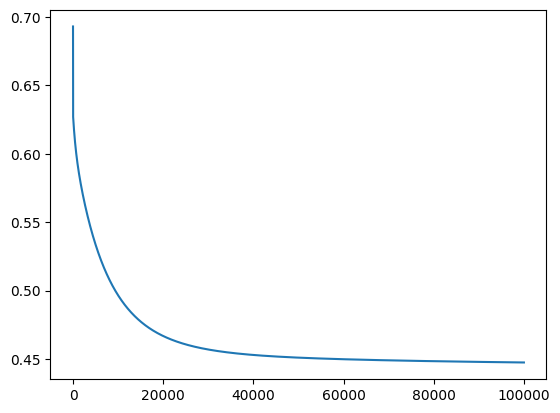

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")


In [ ]:
accuracy(X_test, Y_test, W, B)


Accuracy of the model is :  91.39 %
